# PyUG Meeting Notes from July 25, 2017

## Comments, Issues, Suggestions

1. I appologize for any scheduling confusion
1. PyCon - Seattle : Colin Dietrich
1. SciPy - Austin : Chris Barker
1. Pycascades will be in Vancouver, BC in January
1. Contact Karl Smith if you want to be a Jupyter Hub tester - otherwise, it is not to complicated if you are familiar with Python, to get a local version running on your machine via Conda

**Hey! You can use TeX in Jupyter!**
$E=MC^2$

## Resources

1. [PyAOS](http://pyaos.johnny-lin.com/)
    * American Meteorological Society call for papers for Python modelling (https://annual.ametsoc.org/2018/index.cfm/programs/conferences-and-symposia/eighth-symposium-on-advances-in-modeling-and-analysis-using-python/)    
1.  Numerous resources have been provided by Chris Barker of NOAA-ORR  
    * https://github.com/UWPCE-PythonCert
    * In particular, you may be interested in the Intro class: http://uwpce-pythoncert.github.io/IntroToPython/
and setup info here: http://uwpce-pythoncert.github.io/PythonResources/

## Next Meeting

1. Likely to be in early September as an ***Informal lunch*** at 11:30
1. Bring an example ipynb - we can dive into more functionality then today's intro
1. Karl (if available) or any other person who is familiar can share PyFerret+Jupyter 
1. Ideas for future speakers? (Jake from UW , Phillipe - conda-forge)

## Welcome To Jupyter Notebooks

In [1]:
import pandas as pd

In [2]:
#inline magic 
%matplotlib inline 

https://www.atmos.washington.edu/cgi-bin/latest_uw.cgi

(I did a fair amount of cleaning to the dataset to get the one linked to below)

In [3]:
!git --version #escaping out to commandline calls

git version 1.8.3.1


In [4]:
data = pd.read_csv('../data/SeattleWx_20170725.csv',parse_dates={'datetime':['Day','Time']},index_col='datetime')

**Notice the parse_dates options... this sets up the data to use the dates as the index instead of a sequential number (aka row number) thus allowing us to do refactoring of the data using the dates and times**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1072 entries, 2017-07-25 17:51:40 to 2017-07-25 00:00:40
Data columns (total 8 columns):
RHum(%)                 1072 non-null int64
Temp(F)                 1072 non-null int64
WindDirect              1072 non-null int64
WindSpeed(knot)         1072 non-null int64
WindGust(knot)          1072 non-null int64
Rain(inch)              1072 non-null float64
Radiation(Watts/m^2)    1072 non-null float64
Pres(mbar)              1072 non-null float64
dtypes: float64(3), int64(5)
memory usage: 75.4 KB


In [6]:
data.sort_index().head(10) #sorts by date ascending and outputs first 10 rows

,RHum(%),Temp(F),WindDirect,WindSpeed(knot),WindGust(knot),Rain(inch),Radiation(Watts/m^2),Pres(mbar)
datetime,,,,,,,,
2017-07-25 00:00:40,38,79,331,4,5,0,470.67,1013.7
2017-07-25 00:01:40,38,79,320,5,7,0,468.22,1013.7
2017-07-25 00:02:40,37,79,303,7,10,0,466.10,1013.7
2017-07-25 00:03:40,38,79,324,7,9,0,463.89,1013.7
2017-07-25 00:04:40,38,78,287,6,9,0,462.71,1013.7
2017-07-25 00:05:40,39,78,287,10,13,0,460.80,1013.7
2017-07-25 00:06:40,39,78,293,8,10,0,458.88,1013.7
2017-07-25 00:07:40,39,78,280,9,10,0,455.73,1013.7
2017-07-25 00:08:40,39,78,286,11,12,0,453.44,1013.8


In [7]:
data.max()

RHum(%)                   70.0
Temp(F)                   79.0
WindDirect               360.0
WindSpeed(knot)           12.0
WindGust(knot)            13.0
Rain(inch)                 0.0
Radiation(Watts/m^2)     680.5
Pres(mbar)              1017.1
dtype: float64

In [8]:
data.min()

RHum(%)                   37.0
Temp(F)                   61.0
WindDirect                 0.0
WindSpeed(knot)            0.0
WindGust(knot)             0.0
Rain(inch)                 0.0
Radiation(Watts/m^2)       0.0
Pres(mbar)              1013.4
dtype: float64

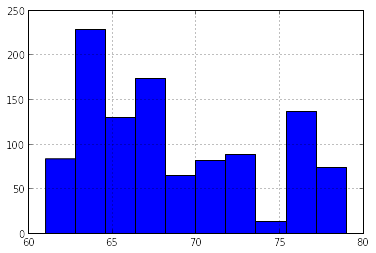

In [9]:
data['Temp(F)'].hist() #histogram of temperatures on this date

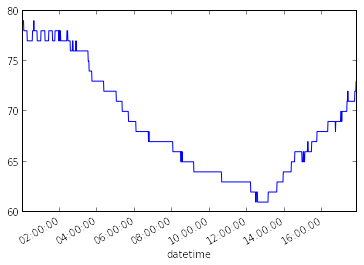

In [10]:
data['Temp(F)'].plot() #timeseries

In [11]:
data.resample('5t').head() #resample ~1min data to 5min data by averaging the number of values in each 5min bin

,RHum(%),Temp(F),WindDirect,WindSpeed(knot),WindGust(knot),Rain(inch),Radiation(Watts/m^2),Pres(mbar)
datetime,,,,,,,,
2017-07-25 00:00:00,37.8,78.8,313.0,5.8,8.0,0,466.318,1013.70
2017-07-25 00:05:00,39.0,78.0,288.0,8.8,10.8,0,455.954,1013.74
2017-07-25 00:10:00,38.2,78.0,292.0,8.6,9.6,0,444.152,1013.80
2017-07-25 00:15:00,39.6,77.0,280.8,9.4,10.2,0,432.910,1013.74
2017-07-25 00:20:00,39.4,77.0,285.8,7.8,10.4,0,420.198,1013.70


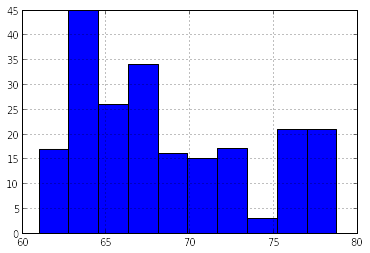

In [12]:
data['Temp(F)'].resample('5t').hist()


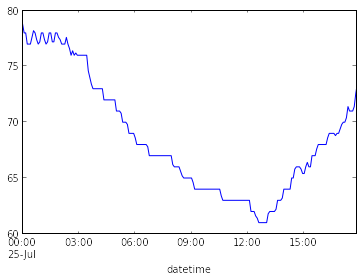

In [13]:
data['Temp(F)'].resample('5t').plot()